In [1]:
import pandas as pd;
import numpy as np;
import json;
# a = pd.read_json('keystrokes-34c38-export (2).json')

In [2]:
# json.loads(open('keystrokes-34c38-export (1).json').readlines())
rawJSON = json.loads("".join(open('keystrokes-34c38-export (4).json').readlines()))

In [3]:
keystrokes=pd.DataFrame.from_dict(rawJSON)
obj = (keystrokes[:1]['samples'])
keystrokes=pd.DataFrame.from_dict(rawJSON['samples']).T

In [4]:
keystrokes

,keystrokes,subject
-KVbkycA8sWfeS5yXEe3,"[[""1478135878083 Shift PRESSED"",""1478135878195...",Joseph Haaga
-KVblIpvWU-VNivjTQzR,"[[""1478135954956 Shift PRESSED"",""1478135955211...",Andrew Sutardji
-KVbnHZpYAW-8tdtmh9X,"[[""1478136483035 Shift PRESSED"",""1478136483124...",Joseph Haaga
-KVbnkYCYNTzNO1a5VK_,"[[""1478136603116 Shift PRESSED"",""1478136603213...",Joseph Haaga
-KVbp0rwVrUiIIGaycmW,"[[""1478136939933 Shift PRESSED"",""1478136940044...",Joseph Haaga
-KVbpFpFBbzcUg1it00x,"[[""1478137001019 Shift PRESSED"",""1478137001131...",Joseph Haaga
-KVbpQT6F9G8erQwRusp,"[[""1478137047346 undefined RELEASED"",""14781370...",Joseph Haaga
-KVd0eAZy5YHyUlnzhnf,"[[""1478157025688 Shift PRESSED"",""1478157025807...",Sean Murphy
-KVfF3_zM6uVQTVFzcYZ,"[[""1478194338378 Shift PRESSED"",""1478194338490...",Justin Golt
-KVfF5BZeMtIsdfAJPw3,"[[""1478194359318 Shift PRESSED"",""1478194359500...",Dr. Michael Dulik


In [12]:
keystrokes.subject.unique().tolist()
# 12 unique subjects

['Joseph Haaga',
 'Andrew Sutardji',
 'Sean Murphy',
 'Justin Golt',
 'Dr. Michael Dulik',
 'Matthew Lee Keith',
 'Rachel Semenov',
 'Ashley Sudney',
 'Eric Roden',
 'Andrew Speight',
 'Scott Oppenheim',
 'Esther Nardone']

## List of features to calculate
  - Dwell times per key (29 features)
  - Flight time

In [234]:
# analyze single subject
recording = keystrokes[:1]['keystrokes'][0]
list_of_recordings = json.loads(recording)
list_of_recordings[0]
split_list = []

# into DataFrame
raw = pd.DataFrame(list_of_recordings[0])
for n in raw.index:
    split_list.append(raw[0][n].split(" "));
split = pd.DataFrame(split_list,columns=['timestamp','key','action'])

In [232]:
def calculatePerKeyDwellTime(dataframe):
    dwell_times = {}
    for i in set(dataframe.key.unique()):
        running_average = 0;
        subset = dataframe[dataframe['key'] == i];
        if(len(dataframe[dataframe['key']==i])%2==0):
            for g in range(len(subset)-1):
                running_average+=(float(subset.iloc[g+1]['timestamp']) - float(subset.iloc[g]['timestamp']));
            running_average/=len(subset);
        else: # last key release not recorded
            for g in range(len(subset)-2):
                running_average+=(float(subset.iloc[g+1]['timestamp']) - float(subset.iloc[g]['timestamp']));
            running_average/=len(subset);
        dwell_times[i] = running_average;
    return dwell_times;    
        

In [233]:
dts = calculatePerKeyDwellTime(split);

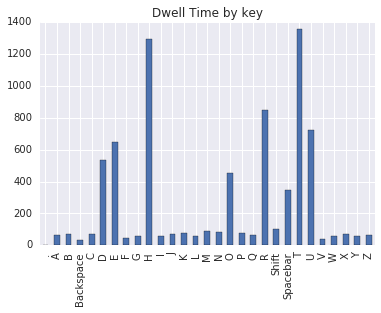

In [342]:
import matplotlib
%matplotlib inline
import seaborn;
pd.Series(dts).plot(kind='bar', title='Dwell Time by key', y='time (ms)')


In [398]:
def calculateFlightTime(dataframe):
#     time between release and next key press
    flight_times = [];
    index_of_releases = ((dataframe[dataframe['action']=='RELEASED']).index.tolist());
    range_of_events = list(range(index_of_releases[0], index_of_releases[-1]));
    index_of_presses = list(set(range_of_events).difference(index_of_releases));
#     print (index_of_presses);
#     print ("# presses: "+str(len(index_of_presses)));
#     print (index_of_releases);
#     print ("# releases: "+str(len(index_of_releases)));
#     drop any releases before the first press
    first_press = index_of_presses[0];
    while (index_of_presses[0]<index_of_releases[0]):
        del index_of_releases[0];
#     for j in range(min(len(index_of_releases),len(index_of_presses))):
    while(len(index_of_presses)>0):
        flight_times.append((float(dataframe['timestamp'].iloc[index_of_presses[0]]) - float(dataframe['timestamp'].iloc[index_of_releases[0]])));
#         fix
        del index_of_releases[0]
        del index_of_presses[0]
    
    return flight_times;

In [399]:
a = calculateFlightTime(split);

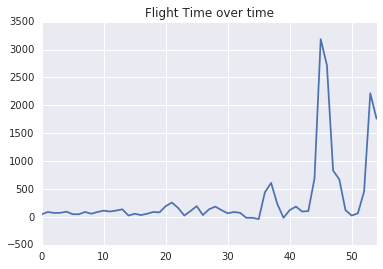

In [400]:
pd.Series(a).plot(title='Flight Time over time')

In [401]:
# Average Flight time
np.average(pd.Series(a))

319.56363636363636

In [402]:
# Max Flight time
np.max(pd.Series(a))

3185.0

In [403]:
# Min Flight time
np.min(pd.Series(a))

-39.0

In [424]:
model_data = {};
for j in range(len(keystrokes)):
    recording = keystrokes['keystrokes'].iloc[j];
    list_of_recordings = json.loads(recording)
    split_list = []

    # into DataFrame
    raw = pd.DataFrame(list_of_recordings[0])
    for n in raw.index:
        split_list.append(raw[0][n].split(" "));
    split = pd.DataFrame(split_list,columns=['timestamp','key','action'])
    dts = calculatePerKeyDwellTime(split);
    fts = calculateFlightTime(split);
    dts['averageFlightTime'] = np.average(fts)
    dts['minFlightTime'] = np.min(fts)
    dts['maxFlightTime'] = np.max(fts)
    dts['subject'] = keystrokes['subject'].iloc[j]
#     model_data[keystrokes['subject'].iloc[j]] = dts
    model_data[keystrokes.iloc[j].name] = dts

In [425]:
input_data = pd.DataFrame(model_data).T.drop(['undefined'],axis=1).dropna(axis=1)

In [426]:
joe = input_data[input_data['subject']=="Joseph Haaga"]

In [427]:
# input_data.drop([''])
training_data = input_data.drop(['-KVbpFpFBbzcUg1it00x','-KVbp0rwVrUiIIGaycmW','-KVbnkYCYNTzNO1a5VK_','-KVbnHZpYAW-8tdtmh9X','-KVbpQT6F9G8erQwRusp'])

In [428]:
training_data

,.,A,B,C,D,E,F,G,H,I,...,U,V,W,X,Y,Z,averageFlightTime,maxFlightTime,minFlightTime,subject
-KVbkycA8sWfeS5yXEe3,0,67.5,69.5,72.5,535.75,644.875,47.5,60.5,1295.75,55.5,...,721.75,41,59.5,68,55.5,67.5,157.913,537,4,Joseph Haaga
-KVblIpvWU-VNivjTQzR,43.5,51.5,79.5,51,455.75,513.75,47.5,55.5,1037.75,51.5,...,553.75,35.5,71.5,55.5,71.5,63,129,273,17,Andrew Sutardji
-KVd0eAZy5YHyUlnzhnf,49,42.5,72.5,76,440.75,468,58,73.5,941.5,73,...,563.75,50.5,64.5,66,31,61,111.205,404,-4,Sean Murphy
-KVfF3_zM6uVQTVFzcYZ,48,56,39.5,64,599.75,704.875,55.5,51.5,1418,36,...,541.333,43.5,40,60,28,56,246,529,40,Justin Golt
-KVfF5BZeMtIsdfAJPw3,72,43.5,52,60,357.75,493.125,32,55.5,1009.75,55.5,...,559.75,48,52,52,60,55.5,111.841,561,-16,Dr. Michael Dulik
-KVfFKWtDRlEodON-9XY,96,64.5,60,71.5,734,749.875,60,64,1500,88,...,808,68,63.5,87.5,40.5,79.5,248.318,600,8,Matthew Lee Keith
-KVfG2U6yhDE-2O05wE2,40,44,28,28,530,457.875,31.5,28,913.75,40,...,515.75,44,31.5,27.5,32,48,172.182,600,0,Rachel Semenov
-KVfIaAfJ57xG252xHLU,32,80,64,56,768,717,64,2509.75,1293.33,72,...,656,48,51.5,64,56,84,280.451,800,8,Ashley Sudney
-KVfLLcHSm_Zlk3e8dLF,39.5,31.5,35.5,52,538,763.875,32,55.5,1529.75,52,...,955.75,40.5,52,48,40,31.5,278.432,1142,-31,Eric Roden
-KVfZlHWlnaZ0RSzhF2S,24,39.5,59.5,31.5,541.75,821.5,44,32,2057.5,587.75,...,865,39.5,951.75,39.5,32,35.5,292.981,1033,48,Andrew Speight
